In [1]:
import pickle

import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from image_colorization import *
from utils import *
from optim import *

%matplotlib inline

In [2]:
use_cuda = False
classification = False

In [3]:
image_list = get_images(n=10)

In [4]:
ab2cat = pickle.load(open('cache/ab2cat_10.pkl', 'rb'))
cat2ab = pickle.load(open('cache/cat2ab_10.pkl', 'rb'))
nearest_neighbors = pickle.load(open('cache/nearest_neighbors.pkl', 'rb'))
inv_distr = np.loadtxt('cache/class_weights.txt')

n_spaces = len(ab2cat)

In [5]:
preprocessor_class = lambda label: get_smoothed_label(label, nearest_neighbors, ab2cat)
preprocessor_reg = lambda label: np.clip(label, -128, 128) / 128

preprocessor = preprocessor_class if classification else preprocessor_reg
dset = ColorizationDataset(image_list, preprocessor)
loader = data.DataLoader(dset, shuffle=True, batch_size=16)

In [6]:
n_outputs = n_spaces if classification else 2
model = ImageColorizer1(n_outputs)
model.apply(weights_init)
optimizer = optim.RMSprop(model.parameters())

class_weights = torch.FloatTensor(inv_distr)

In [7]:
num_epochs = 20
if classification:
    model = train_model_class(model, optimizer, loader, class_weights, num_epochs=num_epochs, show_every=None)
else:
    model = train_model_reg(model, optimizer, loader, num_epochs=num_epochs, show_every=None)

Average: Variable containing:
1.00000e-02 *
  1.2942
[torch.FloatTensor of size 1]

Epoch 0
Average loss: 0.499231278896
Epoch 1
Average loss: 0.48170247674
Epoch 2
Average loss: 0.182058915496
Epoch 3
Average loss: 0.165524974465
Epoch 4
Average loss: 0.149777978659
Epoch 5
Average loss: 0.129930883646
Epoch 6
Average loss: 0.128966629505
Epoch 7
Average loss: 0.0994045883417
Epoch 8
Average loss: 0.0759261399508
Epoch 9
Average loss: 0.073199108243
Epoch 10
Average loss: 0.07319624722
Epoch 11
Average loss: 0.0731928125024
Epoch 12
Average loss: 0.0731902569532
Epoch 13
Average loss: 0.0731883496046
Epoch 14
Average loss: 0.0731867402792
Epoch 15
Average loss: 0.0731851756573
Epoch 16
Average loss: 0.0731839984655
Epoch 17
Average loss: 0.0731825530529
Epoch 18
Average loss: 0.0731817632914
Epoch 19
Average loss: 0.0731801316142


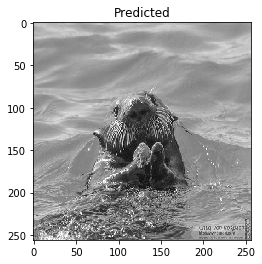

In [10]:
if classification:
    predict_class(model, dset, cat2ab)
else:
    predict_reg(model, dset)